<a href="https://colab.research.google.com/github/casbjr/LABHacker_Analise_de_Dados_em_Python/blob/master/Dados_Pronatec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de cirurgias no DF em 2017 - Curso LAB Hacker

<p align=center><img src="https://lh3.googleusercontent.com/proxy/RSEsMh1bOTVjdDbLC7LV-l-XY34IaABAyCsyaRCaaGPPbgGEZ-2xOpUy3S8KuNULhIgyhhS3BHy5F4AC8qn3wPssVw" width="300px"></p>

Esta é a segunda aula do curso de análise de dados com Python do LABHacker - Câmara dos Deputados (Segundo Dataset analisado). De maneira muito simples a ideia é apresentar algumas das primeiras funções de python. A partir deste estudo, irei incluir algumas análises extras para entender melhor este dataset.







O dataset contém dados do Pronatec de 2017.

#Aula

In [2]:
# importando bibliotecas
# vamos chamar o pandas de pd
import pandas as pd

In [3]:
# Carregar arquivo csv
# Pandas converte os arquivos em um dataframe
# Pro convenção, chamamos o dataframe de df
# o arquivo é separado por ';' , por isso informamos o separador e ele veio de um excel, por isso o codificador 'cp1252'
df = pd.read_csv('https://raw.githubusercontent.com/casbjr/LABHacker_Analise_de_Dados_em_Python/master/PDA_UNIDADES_RF_EPCT_CSV.csv', sep = ';', encoding = 'cp1252')
# A única alteração realizada entre mai/19 e mai/20 aqui foi direcionar o arquivo .csv para um arquivo salvo em meu Github, para ter os dados disponíveis na nuvem

# Mostra as 5 primeiras linhas do df
df.head()

,CODIGO_UNIDADE,NOME_UNIDADE,DT_AUTORIZA_FUNCIONA_UNID,NOME_REGIAO_UNIDADE,SIGLA_UF_UNIDADE,NOME_MUNICIPIO_UNIDADE,NOME_MESORREGIAO_UNIDADE,NOME_MICRORREGIAO_UNIDADE
0,2879,INSTITUTO FEDERAL DA BAHIA - CAMPUS EUNÁPOLIS,07-01-2009,Nordeste,BA,Eunápolis,Sul Baiano,Porto Seguro
1,2948,INSTITUTO FEDERAL BAIANO - CAMPUS ITAPETINGA,07-01-2009,Nordeste,BA,Itapetinga,Centro Sul Baiano,Itapetinga
2,14328,INSTITUTO FEDERAL DO ACRE - CAMPUS SENA MADUREIRA,30-12-2008,Norte,AC,Sena Madureira,Vale do Acre,Sena Madureira
3,14547,INSTITUTO FEDERAL DE ALAGOAS - CAMPUS ARAPIRACA,06-07-2010,Nordeste,AL,Arapiraca,Agreste Alagoano,Arapiraca
4,32010,INSTITUTO FEDERAL DE ALAGOAS - CAMPUS CORURIPE,22-01-2014,Nordeste,AL,Coruripe,Leste Alagoano,São Miguel dos Campos


In [4]:
# Quantas escolas no arquivo?
df.count()

CODIGO_UNIDADE               618
NOME_UNIDADE                 618
DT_AUTORIZA_FUNCIONA_UNID    618
NOME_REGIAO_UNIDADE          618
SIGLA_UF_UNIDADE             618
NOME_MUNICIPIO_UNIDADE       618
NOME_MESORREGIAO_UNIDADE     618
NOME_MICRORREGIAO_UNIDADE    618
dtype: int64

In [5]:
# Descreve coluna numérica
df.describe()

,CODIGO_UNIDADE
count,618.000000
mean,16255.610032
std,12973.588737
min,354.000000
25%,2998.500000
50%,13840.500000
75%,30818.250000
max,44307.000000


In [6]:
# Descreve tipo de cada coluna do arquivo
df.dtypes

CODIGO_UNIDADE                int64
NOME_UNIDADE                 object
DT_AUTORIZA_FUNCIONA_UNID    object
NOME_REGIAO_UNIDADE          object
SIGLA_UF_UNIDADE             object
NOME_MUNICIPIO_UNIDADE       object
NOME_MESORREGIAO_UNIDADE     object
NOME_MICRORREGIAO_UNIDADE    object
dtype: object

In [7]:
# Quantas escolas por região
df['NOME_REGIAO_UNIDADE'].value_counts()

Nordeste        202
Sudeste         163
Sul             116
Norte            70
Centro-Oeste     67
Name: NOME_REGIAO_UNIDADE, dtype: int64

In [8]:
# Quantas escolas por UF
df['SIGLA_UF_UNIDADE'].value_counts()


MG    67
RS    45
RJ    39
SC    36
SP    35
PR    35
BA    34
CE    27
MA    27
GO    26
RN    23
PE    23
PI    23
ES    22
PB    21
PA    20
MT    19
AL    16
AM    15
MS    11
DF    11
TO    11
RO     8
SE     8
AC     6
RR     6
AP     4
Name: SIGLA_UF_UNIDADE, dtype: int64

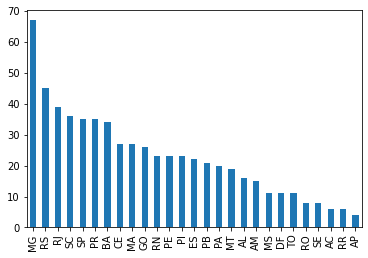

In [9]:
# Mostrando os dados em um gráfico
# Precisamos informar que queremos visualizar o gráfico no próprio notebook
# Mostrar UF em gráfico de barras

%matplotlib inline
df['SIGLA_UF_UNIDADE'].value_counts().plot.bar()


#Análises extras, além do que foi apresentado em aula


Para ter uma melhor visão da distribuição de unidades do Pronatec, decidi realizar alguns plots:

*   Basemap baseado em lat long (retirado de outro dataset, utilizando o nome da cidade);
*   Gráfico de barras para uma visão por regiões;

In [10]:
# Adiciona De Para de lat long
coord = pd.read_csv('https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/master/csv/municipios.csv', sep = ',')
dados_com_coord = df.join(coord.set_index('nome'), on='NOME_MUNICIPIO_UNIDADE')

dados_com_coord.head(3)

,CODIGO_UNIDADE,NOME_UNIDADE,DT_AUTORIZA_FUNCIONA_UNID,NOME_REGIAO_UNIDADE,SIGLA_UF_UNIDADE,NOME_MUNICIPIO_UNIDADE,NOME_MESORREGIAO_UNIDADE,NOME_MICRORREGIAO_UNIDADE,codigo_ibge,latitude,longitude,capital,codigo_uf
0,2879,INSTITUTO FEDERAL DA BAHIA - CAMPUS EUNÁPOLIS,07-01-2009,Nordeste,BA,Eunápolis,Sul Baiano,Porto Seguro,2910727,-16.37150,-39.5821,0,29
1,2948,INSTITUTO FEDERAL BAIANO - CAMPUS ITAPETINGA,07-01-2009,Nordeste,BA,Itapetinga,Centro Sul Baiano,Itapetinga,2916401,-15.24750,-40.2482,0,29
2,14328,INSTITUTO FEDERAL DO ACRE - CAMPUS SENA MADUREIRA,30-12-2008,Norte,AC,Sena Madureira,Vale do Acre,Sena Madureira,1200500,-9.06596,-68.6571,0,12


In [11]:
#instalação do basemap 
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip -q

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (169 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144487 files and directories currently installed.)
Pre

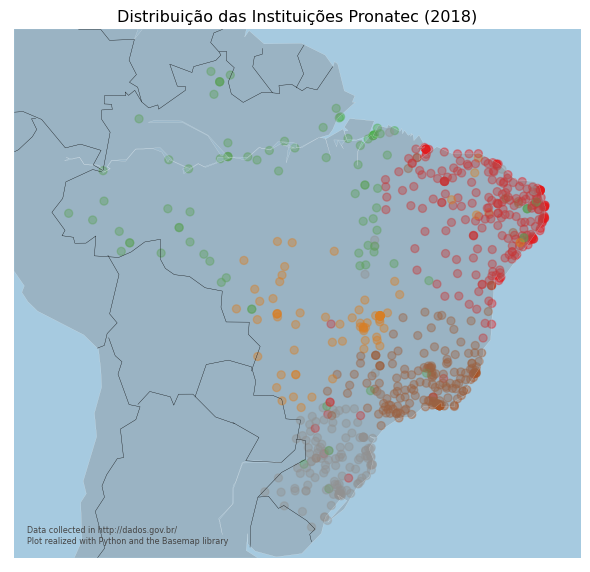

In [12]:
# Libraries
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline
 
# Set the dimension of the figure
my_dpi=96
plt.figure(figsize=(900/my_dpi, 700/my_dpi), dpi=my_dpi)

# Make the background map
m=Basemap(llcrnrlat=-35, urcrnrlat=7, llcrnrlon=-77, urcrnrlon=-32, resolution='c')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
m.drawcountries(linewidth=0.25)
 
# prepare a color for each point depending on the region.
dados_com_coord['labels_estado'] = pd.factorize(dados_com_coord['NOME_REGIAO_UNIDADE'])[0]
 
# Add a point per position
m.scatter(dados_com_coord['longitude'], dados_com_coord['latitude'], alpha=0.4, c=dados_com_coord['labels_estado'], cmap="Set1")
 
# title 
plt.title('Distribuição das Instituições Pronatec (2018)')


# copyright and source data info
plt.text( -76, -34,'Data collected in http://dados.gov.br/ \nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=6, color='#454545' )
plt.show()
# Save as png
#plt.savefig('#315_Tweet_Surf_Bubble_map1.png', bbox_inches='tight')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


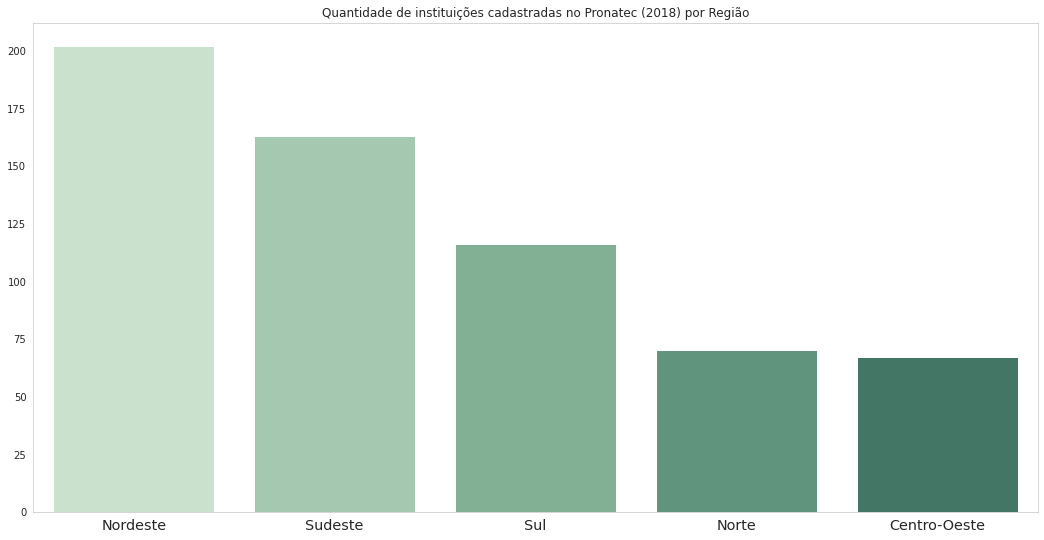

In [13]:
import seaborn as sns
sns.set_style("whitegrid")
descending_order = df.NOME_REGIAO_UNIDADE.value_counts().sort_values(ascending=False).index

chart = plt.figure(figsize=(18,9))
g = sns.countplot(df.NOME_REGIAO_UNIDADE, order=descending_order,
              palette=sns.color_palette("ch:2.5,-.2,dark=.3"))

plt.xticks(horizontalalignment='center',
           fontweight='light',
           fontsize='x-large'  
)

# ADDED: Remove labels.
g.set_ylabel('')    
g.set_xlabel('')

g.grid( False )


# title 
plt.title('Quantidade de instituições cadastradas no Pronatec (2018) por Região')

plt.show()
